In [1]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_data
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08-07 14:29:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023-03-13 06:16:16
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023-03-12 06:18:18
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}",2023-03-12 06:32:36
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023-03-12 06:32:15


In [3]:
df_DA_PL = df[(df["job_country"] == "Poland")]

In [4]:
df_DA_PL

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_data
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",2023-10-16 13:36:54
108,Data Engineer,Chapter Lead Data Engineers Poland,"Wrocław, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-16 13:58:03,False,False,Poland,None,NaN,NaN,Volvo Group,"[azure, excel, unity]","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-01-16 13:58:03
125,Data Engineer,Data Engineer,"Kraków, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-04 14:12:20,True,False,Poland,None,NaN,NaN,SII Group,"[sql, shell, python, aws]","{'cloud': ['aws'], 'programming': ['sql', 'she...",2023-06-04 14:12:20
136,Data Scientist,Mid/ Senior Data Scientist with NLP,Anywhere,via LinkedIn,Full-time,True,Poland,2023-12-21 13:10:55,False,False,Poland,None,NaN,NaN,Trans.eu Group,"[python, sql, snowflake, aws, scikit-learn, ke...","{'cloud': ['snowflake', 'aws'], 'libraries': [...",2023-12-21 13:10:55
351,Software Engineer,Data Platform Software Engineer,"Warsaw, Poland",via Adzuna.pl,Full-time,False,Poland,2023-06-23 13:58:41,True,False,Poland,None,NaN,NaN,IBM,"[python, sql, shell, ibm cloud, linux]","{'cloud': ['ibm cloud'], 'os': ['linux'], 'pro...",2023-06-23 13:58:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785549,Data Scientist,Data Scientist,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:55,False,False,Poland,None,NaN,NaN,Citi,"[python, r]","{'programming': ['python', 'r']}",2023-01-13 06:41:55
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None,2023-01-13 06:41:53
785650,Software Engineer,Integration Analyst,"Łódź, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-26 06:24:52,False,False,Poland,None,NaN,NaN,Team Quest,"[sql, oracle, aws, sap, atlassian]","{'analyst_tools': ['sap'], 'cloud': ['oracle',...",2023-04-26 06:24:52
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,"[python, aws, gcp, azure, tensorflow, pytorch,...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",2023-06-07 06:18:29


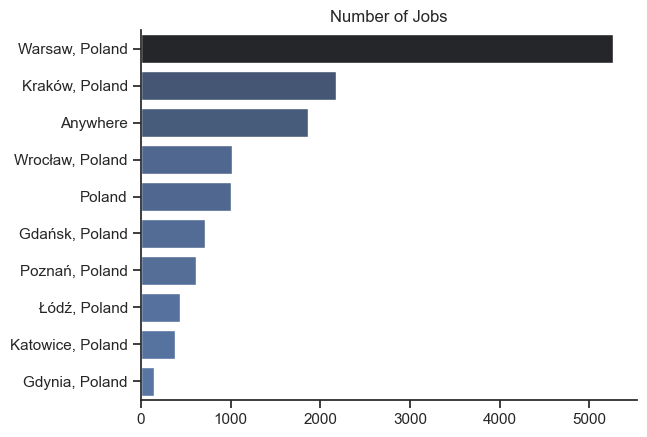

In [8]:
df_plot = df_DA_PL["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x ="count", y="job_location", hue="count", palette='dark:b_r', legend=False)
sns.despine()
plt.title("Number of Jobs")
plt.xlabel("")
plt.ylabel("")
plt.show()